In [50]:
# Load the basic data wrangling modules
import pandas as pd
import numpy as np

In [2]:
pd.__version__

'1.1.1'

In [3]:
np.__version__

'1.19.3'

In [6]:
# List of two a and b
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

In [7]:
a + b

array([5, 7, 9])

In [8]:
a - b

array([-3, -3, -3])

In [9]:
a * b

array([ 4, 10, 18])

In [10]:
a / b

array([0.25, 0.4 , 0.5 ])

In [11]:
text = "1,2,3,4,5,6,7"

In [16]:
df = pd.DataFrame({
    "name": ["john", "mike", "tom", "hardy", "jack"],
    "age": [25, 40, 34, 23, 21],
    "gender": ("Male", "Male", "Male", "Female", "Male") 
})

In [17]:
df

,name,age,gender
0,john,25,Male
1,mike,40,Male
2,tom,34,Male
3,hardy,23,Female
4,jack,21,Male


In [32]:
for record in df.values:
    print(record)

['john' 25 'Male']
['mike' 40 'Male']
['tom' 34 'Male']
['hardy' 23 'Female']
['jack' 21 'Male']


In [34]:
def convert(n):
    if n == 'john':
        return 0
    if n == 'mike':
        return 1
    if n == 'tom':
        return 2
    if n == 'hardy':
        return 3
    if n == 'jack':
        return 4
    

In [35]:
convert('tom')

2

In [37]:
df['cname'] = df['name'].apply(convert)

In [39]:
def convert_gender(n):
    if n == 'Male':
        return 1
    if n == 'Female':
        return 0

In [41]:
df['cgender'] = df['gender'].apply(convert_gender)

In [44]:
df[['age', 'cname', 'cgender']].values

array([[25,  0,  1],
       [40,  1,  1],
       [34,  2,  1],
       [23,  3,  0],
       [21,  4,  1]])

In [45]:
df

,name,age,gender,cname,cgender
0,john,25,Male,0,1
1,mike,40,Male,1,1
2,tom,34,Male,2,1
3,hardy,23,Female,3,0
4,jack,21,Male,4,1


In [46]:
df

,name,age,gender,cname,cgender
0,john,25,Male,0,1
1,mike,40,Male,1,1
2,tom,34,Male,2,1
3,hardy,23,Female,3,0
4,jack,21,Male,4,1


In [47]:
df1 = pd.DataFrame({
    "john": [1, 0, 0, 0, 0],
    "mike": [0, 1, 0, 0, 0],
    "tom" : [0, 0, 1, 0, 0],
    "hardy": [0, 0, 0, 1, 0],
    "jack": [0 ,0 ,0,0,1],
    "age": [25, 40, 34, 23, 21],
    "male": [1, 1, 1, 0, 1],
    "female": [0, 0, 0, 1, 0]
})

In [48]:
df1

,john,mike,tom,hardy,jack,age,male,female
0,1,0,0,0,0,25,1,0
1,0,1,0,0,0,40,1,0
2,0,0,1,0,0,34,1,0
3,0,0,0,1,0,23,0,1
4,0,0,0,0,1,21,1,0


In [51]:
df

,name,age,gender,cname,cgender
0,john,25,Male,0,1
1,mike,40,Male,1,1
2,tom,34,Male,2,1
3,hardy,23,Female,3,0
4,jack,21,Male,4,1


In [59]:
data = pd.DataFrame({
    
    "datetime": ['2020/05/01-01:10:00', '2020/05/02-10:10:20', '2020/05/03-12:10:00', '2020/05/04-05:01:00', '2020/05/05-06:01:01'],
    "name": ['Mr. John', 'Mr. Mike', 'Miss.Jenny', 'Dr.Hardy', 'Prof.Jack'],
    "height": [150, 140, np.nan, 164, 170],
    "weight": [65.5, 50.5, 70.2, 80, 90],
    "age": [np.nan, 40, 42, 55, 60],
    "gender": ['male', 'male', 'female', np.nan, 'male'],
    "is_survived": [1, 1, 0, 1, 0]
})


In [60]:
data

,datetime,name,height,weight,age,gender,is_survived
0,2020/05/01-01:10:00,Mr. John,150.0,65.5,NaN,male,1
1,2020/05/02-10:10:20,Mr. Mike,140.0,50.5,40.0,male,1
2,2020/05/03-12:10:00,Miss.Jenny,NaN,70.2,42.0,female,0
3,2020/05/04-05:01:00,Dr.Hardy,164.0,80.0,55.0,NaN,1
4,2020/05/05-06:01:01,Prof.Jack,170.0,90.0,60.0,male,0


## Feature Engineering 
- Handling datetime values
- Handling missing values in categorical variable
- Handling missing values in continuous variable
- Encoding categorical variable
- Scaling and Standardizing continuous variable

## Handling Datetime Feature

In [61]:
a = "2020/05/01-01:10:00"

In [62]:
type(a)

str

In [64]:
date, time = a.split('-')

In [65]:
date

'2020/05/01'

In [66]:
time

'01:10:00'

In [67]:
yyyy, mm, dd = date.split('/')

In [71]:
print('Year', yyyy)
print('Month', mm)
print('Year', dd)

Year 2020
Month 05
Year 01


In [72]:
hh, mi, sec = time.split(':')

In [73]:
print("Hour", hh)
print("Min", mi)
print("Sec", sec)

Hour 01
Min 10
Sec 00


In [76]:
def split_datetime(d):
    # Split the `2020/05/01-01:10:00` using `-` and 
    # get date and time seperated
    date, time = d.split('-')
        
    # Split the `date` variable in `yyyy, mm, dd`
    yyyy, mm, dd = date.split('/')
    
    # Split the `time` variable into `hh,mi,sec` 
    hh, mi, sec = time.split(':')
    
    return {
        'year': int(yyyy),
        'month': int(mm),
        'day': int(dd),
        'hour': int(hh),
        'minute': int(mi),
        'second': int(sec)
    }

In [99]:
split_datetime(a)

{'year': 2020, 'month': 5, 'day': 1, 'hour': 1, 'minute': 10, 'second': 0}

In [101]:
data.drop('sample', axis=1, inplace=True)

In [102]:
data

,datetime,name,height,weight,age,gender,is_survived
0,2020/05/01-01:10:00,Mr. John,150.0,65.5,NaN,male,1
1,2020/05/02-10:10:20,Mr. Mike,140.0,50.5,40.0,male,1
2,2020/05/03-12:10:00,Miss.Jenny,NaN,70.2,42.0,female,0
3,2020/05/04-05:01:00,Dr.Hardy,164.0,80.0,55.0,NaN,1
4,2020/05/05-06:01:01,Prof.Jack,170.0,90.0,60.0,male,0


In [106]:
for d in data['datetime']:
    print("Day", split_datetime(d)['day'])

Day 1
Day 2
Day 3
Day 4
Day 5


In [114]:
# List comprehension
data['day'] = [split_datetime(d)['day'] for d in data['datetime']]

In [115]:
data

,datetime,name,height,weight,age,gender,is_survived,day
0,2020/05/01-01:10:00,Mr. John,150.0,65.5,NaN,male,1,1
1,2020/05/02-10:10:20,Mr. Mike,140.0,50.5,40.0,male,1,2
2,2020/05/03-12:10:00,Miss.Jenny,NaN,70.2,42.0,female,0,3
3,2020/05/04-05:01:00,Dr.Hardy,164.0,80.0,55.0,NaN,1,4
4,2020/05/05-06:01:01,Prof.Jack,170.0,90.0,60.0,male,0,5


In [116]:
data['month'] = [split_datetime(d)['month'] for d in data['datetime']]
data['year'] = [split_datetime(d)['year'] for d in data['datetime']]
data['hour'] = [split_datetime(d)['hour'] for d in data['datetime']]
data['minute'] = [split_datetime(d)['minute'] for d in data['datetime']]
data['second'] = [split_datetime(d)['second'] for d in data['datetime']]

In [117]:
data

,datetime,name,height,weight,age,gender,is_survived,day,month,year,hour,minute,second
0,2020/05/01-01:10:00,Mr. John,150.0,65.5,NaN,male,1,1,5,2020,1,10,0
1,2020/05/02-10:10:20,Mr. Mike,140.0,50.5,40.0,male,1,2,5,2020,10,10,20
2,2020/05/03-12:10:00,Miss.Jenny,NaN,70.2,42.0,female,0,3,5,2020,12,10,0
3,2020/05/04-05:01:00,Dr.Hardy,164.0,80.0,55.0,NaN,1,4,5,2020,5,1,0
4,2020/05/05-06:01:01,Prof.Jack,170.0,90.0,60.0,male,0,5,5,2020,6,1,1


In [118]:
# Lets drop the `datetime` column forever
data.drop('datetime', axis=1, inplace=True)

In [119]:
data

,name,height,weight,age,gender,is_survived,day,month,year,hour,minute,second
0,Mr. John,150.0,65.5,NaN,male,1,1,5,2020,1,10,0
1,Mr. Mike,140.0,50.5,40.0,male,1,2,5,2020,10,10,20
2,Miss.Jenny,NaN,70.2,42.0,female,0,3,5,2020,12,10,0
3,Dr.Hardy,164.0,80.0,55.0,NaN,1,4,5,2020,5,1,0
4,Prof.Jack,170.0,90.0,60.0,male,0,5,5,2020,6,1,1


## Create Profession Column Using Name

In [121]:
a = 'Mr. John'

In [124]:
def extract_prof(d):
    prof, name = d.split('.')
    return prof

In [125]:
extract_prof(a)

'Mr'

In [126]:
data['profession'] = data['name'].apply(extract_prof)

In [127]:
data

,name,height,weight,age,gender,is_survived,day,month,year,hour,minute,second,profession
0,Mr. John,150.0,65.5,NaN,male,1,1,5,2020,1,10,0,Mr
1,Mr. Mike,140.0,50.5,40.0,male,1,2,5,2020,10,10,20,Mr
2,Miss.Jenny,NaN,70.2,42.0,female,0,3,5,2020,12,10,0,Miss
3,Dr.Hardy,164.0,80.0,55.0,NaN,1,4,5,2020,5,1,0,Dr
4,Prof.Jack,170.0,90.0,60.0,male,0,5,5,2020,6,1,1,Prof


In [128]:
# Lets remove `name` columns
data.drop('name', axis=1, inplace=True)

In [129]:
data

,height,weight,age,gender,is_survived,day,month,year,hour,minute,second,profession
0,150.0,65.5,NaN,male,1,1,5,2020,1,10,0,Mr
1,140.0,50.5,40.0,male,1,2,5,2020,10,10,20,Mr
2,NaN,70.2,42.0,female,0,3,5,2020,12,10,0,Miss
3,164.0,80.0,55.0,NaN,1,4,5,2020,5,1,0,Dr
4,170.0,90.0,60.0,male,0,5,5,2020,6,1,1,Prof


## Handling Missing Value In Continuous 
- Replace with mean
- Replace with median

In [135]:
data['height'].fillna(data['height'].mean(), inplace=True)

In [136]:
data

,height,weight,age,gender,is_survived,day,month,year,hour,minute,second,profession
0,150.0,65.5,NaN,male,1,1,5,2020,1,10,0,Mr
1,140.0,50.5,40.0,male,1,2,5,2020,10,10,20,Mr
2,156.0,70.2,42.0,female,0,3,5,2020,12,10,0,Miss
3,164.0,80.0,55.0,NaN,1,4,5,2020,5,1,0,Dr
4,170.0,90.0,60.0,male,0,5,5,2020,6,1,1,Prof


## Handling Missing value in Discrete

In [139]:
data['age'].fillna(data['age'].median(), inplace=True)

In [140]:
data

,height,weight,age,gender,is_survived,day,month,year,hour,minute,second,profession
0,150.0,65.5,48.5,male,1,1,5,2020,1,10,0,Mr
1,140.0,50.5,40.0,male,1,2,5,2020,10,10,20,Mr
2,156.0,70.2,42.0,female,0,3,5,2020,12,10,0,Miss
3,164.0,80.0,55.0,NaN,1,4,5,2020,5,1,0,Dr
4,170.0,90.0,60.0,male,0,5,5,2020,6,1,1,Prof


## Handling Missing Categorical Variable

In [142]:
data['gender'].isna().any()

True

In [145]:
data['gender'].describe()

count        4
unique       2
top       male
freq         3
Name: gender, dtype: object

In [193]:
data['gender'].fillna(data['gender'].mode()[0], inplace=True)

In [194]:
data

,height,weight,age,gender,is_survived,day,month,year,hour,minute,second,profession,bmi
0,150.0,65.5,48.5,male,1,1,5,2020,1,10,0,Mr,0.0
1,140.0,50.5,40.0,male,1,2,5,2020,10,10,20,Mr,0.0
2,156.0,70.2,42.0,female,0,3,5,2020,12,10,0,Miss,0.0
3,164.0,80.0,55.0,male,1,4,5,2020,5,1,0,Dr,0.0
4,170.0,90.0,60.0,male,0,5,5,2020,6,1,1,Prof,0.0


### Create New `BMI` column using `weight` and `height`

````
    Formula to calculate the BMI value
    round(weight / (height * height), 2)
````

In [160]:
def calculate_bmi(weight, height):
    return round(weight / (height * height), 2)

In [163]:
calculate_bmi(70.5, 150.0)

0.0

In [174]:
data['bmi'] = [calculate_bmi(d['weight'], d['height']) for idx, d in data.iterrows()]

In [175]:
data

,height,weight,age,gender,is_survived,day,month,year,hour,minute,second,profession,bmi
0,150.0,65.5,48.5,male,1,1,5,2020,1,10,0,Mr,0.0
1,140.0,50.5,40.0,male,1,2,5,2020,10,10,20,Mr,0.0
2,156.0,70.2,42.0,female,0,3,5,2020,12,10,0,Miss,0.0
3,164.0,80.0,55.0,male,1,4,5,2020,5,1,0,Dr,0.0
4,170.0,90.0,60.0,male,0,5,5,2020,6,1,1,Prof,0.0


In [176]:
calculate_bmi(85, 5.8)

2.53

In [179]:
enc_data = pd.get_dummies(data[['gender', 'profession']])

In [182]:
final_df = pd.concat([data, enc_data], axis=1)

In [183]:
final_df

,height,weight,age,gender,is_survived,day,month,year,hour,minute,second,profession,bmi,gender_female,gender_male,profession_Dr,profession_Miss,profession_Mr,profession_Prof
0,150.0,65.5,48.5,male,1,1,5,2020,1,10,0,Mr,0.0,0,1,0,0,1,0
1,140.0,50.5,40.0,male,1,2,5,2020,10,10,20,Mr,0.0,0,1,0,0,1,0
2,156.0,70.2,42.0,female,0,3,5,2020,12,10,0,Miss,0.0,1,0,0,1,0,0
3,164.0,80.0,55.0,male,1,4,5,2020,5,1,0,Dr,0.0,0,1,1,0,0,0
4,170.0,90.0,60.0,male,0,5,5,2020,6,1,1,Prof,0.0,0,1,0,0,0,1


In [184]:
final_df.drop(['gender', 'profession'], axis=1, inplace=True)

In [188]:
final_df.dtypes

height             float64
weight             float64
age                float64
is_survived          int64
day                  int64
month                int64
year                 int64
hour                 int64
minute               int64
second               int64
bmi                float64
gender_female        uint8
gender_male          uint8
profession_Dr        uint8
profession_Miss      uint8
profession_Mr        uint8
profession_Prof      uint8
dtype: object

In [192]:
data['gender'].mode()[0]

0    male
dtype: object

In [204]:
one = np.random.uniform(low=0.5, high=13.3, size=(50,))

In [205]:
two = np.random.uniform(low=10, high=103, size=(50,))

In [206]:
pd.DataFrame({"age": one, "height": two})

,age,height
0,1.310188,63.482038
1,6.882650,57.115513
2,12.348383,48.511560
3,0.563316,95.539770
4,8.138889,88.878240
5,5.291386,78.674881
6,6.447002,80.795137
7,6.225962,68.717607
8,6.304259,78.176598
9,8.727357,86.418866


In [207]:
from statsmodels.stats.proportion import proportions_ztest

In [217]:
from statsmodels.stats.proportion import proportions_ztest
count = np.array([5, 12])
count2 = np.array([6, 12])
stat, pval = proportions_ztest(count, count2)

In [222]:
pval

0.14561009539686715

In [223]:
age = np.random.uniform(low=10, high=70, size=(100,))
height = np.random.uniform(low=100, high=180, size=(100,))
weight = np.random.uniform(low=60, high=90, size=(100,))


In [231]:
survival = np.random.choice([0, 1], size=(100, ))

In [233]:
data = pd.DataFrame({'age': age, 'height': height, 'weight': weight, 'survival': survival})

In [235]:
data.shape

(100, 4)

In [238]:
data.head()

,age,height,weight,survival
0,45.784301,108.851695,62.376435,1
1,53.086694,161.168409,69.565379,0
2,28.420995,127.735102,63.529691,1
3,10.103839,177.148541,78.300418,0
4,33.837936,145.232461,82.858846,0


In [239]:
# Build a classification model 
from sklearn.tree import DecisionTreeClassifier

In [240]:
# Seperate the Features and Target
X = data[['age', 'weight', 'height']]
y = data['survival']

In [244]:
# Initiate a model 
clf = DecisionTreeClassifier()

In [246]:
# Module to split the data `X` and `y` into 70/30
from sklearn.model_selection import train_test_split

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [256]:
print("70 Training features of X: ", X_train.shape)
print("30 Testing features of X:", X_test.shape)
print("70 Answers for Training Y:", y_train.shape)
print("30 Answers for Testing Y:", y_test.shape)

70 Training features of X:  (70, 3)
30 Testing features of X: (30, 3)
70 Answers for Training Y: (70,)
30 Answers for Testing Y: (30,)


In [257]:
# Train the model 
'''
    X_train: 70 features
    y_train: 70 answers 
'''
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [258]:
result = clf.predict(X_test)

In [259]:
result

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1])

In [261]:
y_test.values

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1])

In [262]:
from sklearn.metrics import accuracy_score

In [264]:
accuracy_score(result, y_test)*100

56.666666666666664

In [265]:
from sklearn.tree import DecisionTreeRegressor

In [266]:
X = data[['weight', 'height', 'survival']]

In [267]:
y = data['age']

In [272]:
clf = DecisionTreeRegressor()

In [273]:
from sklearn.model_selection import cross_val_score

In [281]:
cross_val_score(clf, X, y, scoring='neg_mean_squared_error').mean()

-613.19282196844

In [282]:
data

,age,height,weight,survival
0,45.784301,108.851695,62.376435,1
1,53.086694,161.168409,69.565379,0
2,28.420995,127.735102,63.529691,1
3,10.103839,177.148541,78.300418,0
4,33.837936,145.232461,82.858846,0
...,...,...,...,...
95,54.712441,135.217107,76.162883,1
96,45.702940,147.717839,81.304453,0
97,24.258373,148.794090,65.114141,0
98,58.427959,126.924031,74.049883,0


In [284]:
df = pd.read_csv('titanic3.csv')

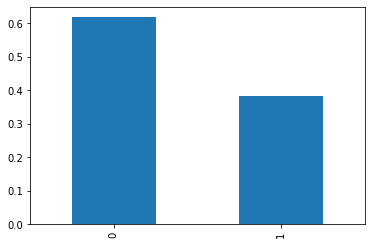

In [292]:
df['survived'].value_counts(normalize=True).plot(kind='bar')

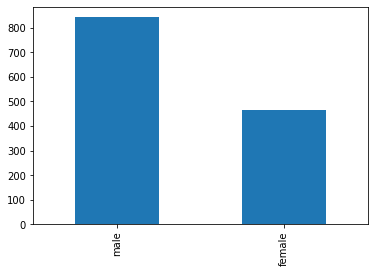

In [295]:
df['sex'].value_counts().plot(kind='bar')

In [296]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [302]:
df['age'].describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

## Statistical Tests

#### One Sample Proportion Test

In [317]:
# One Sample Proportion Test
from statsmodels.stats.proportion import proportions_ztest
first = np.array([5, 12])
second = np.array([6, 12])
stat, pval = proportions_ztest(first, second)
#print(stat)

if pval < 0.05:
    print("Reject the H0 Hypothesis")
else:
    print("Accept the H0")


# count = np.array([5, 12])
# count2 = np.array([6, 12])
# stat, pval = proportions_ztest(count, count2)

Accept the H0


#### Chi Squared Test

In [325]:
# Chi Squared
from scipy.stats import chi2_contingency

# we create contingency table same as above
table = [[20, 30, 15], [20,  15,  30]]

# Get chi-square value , p-value, degrees of freedom, expected frequencies using the function chi2_contingency
stat, p, dof, expected = chi2_contingency(table)

# select significance value
alpha = 0.05

# Determine whether to reject or keep your null hypothesis
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Variables are associated (reject H0)')
else:
    print('Variables are not associated(fail to reject H0)')

significance=0.050, p=0.007
Variables are associated (reject H0)


#### T-Test

In [329]:
# Student's t-test for independent samples
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# compare samples
stat, p = ttest_ind(data1, data2)
print('t=%.3f, p=%.3f' % (stat, p))

print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Both are same (reject H0)')
else:
    print('Both are different (fail to reject H0)')

t=-2.262, p=0.025
significance=0.050, p=0.025
Both are same (reject H0)


#### Correlation Test

data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


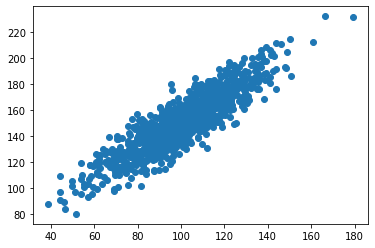

In [332]:
# Correlation test
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
# plot
pyplot.scatter(data1, data2)
pyplot.show()

In [335]:
# calculate the spearmans's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate spearman's correlation
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.872


MSE 644.8110745468045


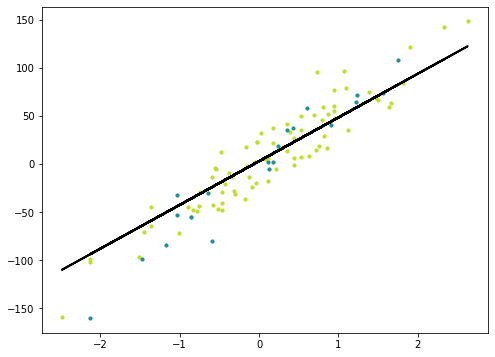

In [336]:
import numpy as np 


class LinearRegression:

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None


    def fit(self, X, y):
        '''
        Fit method takes the features `X` and `y` target
        build a linear model and calculate the weights and bias
        dynamically using `dw` and `db` and update the weights
        and bias using gradient descenting. 
        '''
        n_samples, n_features = X.shape

        # initalize the weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0


        # Start the learn algorithm gradient descenting
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias

            # Compute the weights and bias dynamically 
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update the weights and bias with actual
            self.weights -= self.lr * dw
            self.bias -= self.lr * db


    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return np.array(y_predicted)


def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)



from sklearn import datasets
from sklearn.model_selection import train_test_split


X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=6)


# Lets split the dataset into 80 training and 20 testing examples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Train the model using LinearRegression
clf = LinearRegression(lr=0.001, n_iters=2000)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

mse = mean_squared_error(y_test, prediction)
print("MSE", mse)


import matplotlib.pyplot as plt

y_prediction = clf.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m1 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_prediction, color='black', linewidth=2, label='Prediction')
plt.show()

In [337]:
class LogisticRegression:
    
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    
    def sigmoid(self, X):
        return 1 / (1 + np.exp(-x))


    def fit(self, X, y):
        '''
        Fit method takes the features `X` and `y` target
        build a linear model and calculate the weights and bias
        dynamically using `dw` and `db` and update the weights
        and bias using gradient descenting. 
        '''
        n_samples, n_features = X.shape

        # initalize the weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0


        # Start the learn algorithm gradient descenting
        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            # Compute the weights and bias dynamically 
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update the weights and bias with actual
            self.weights -= self.lr * dw
            self.bias -= self.lr * db


    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_pred_class = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_pred_class)